### Introduction to artificial intelligence

This notebook contains a Script with a implementation of neural network for regression problem.

Author:
    Oscar Hernández Terán
    
Bachelor's Degree:
    Geophysical Engineer

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
import keras

In [3]:
# We load the data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
# We cech the names of the features 
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
# Split arrays or matrices into random train and test subsets 
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
# We initialize the values to retrieve random numbers
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
# Here create the neural network
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [10]:
# Features of ANN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
# We compile the model
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

In [12]:
# We train the ANN
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [13]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 988us/step - loss: 0.3942 - mae: 0.4502


In [14]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900256991386414,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880087852478027,
  0.5803284645080566,
  0.516608536243

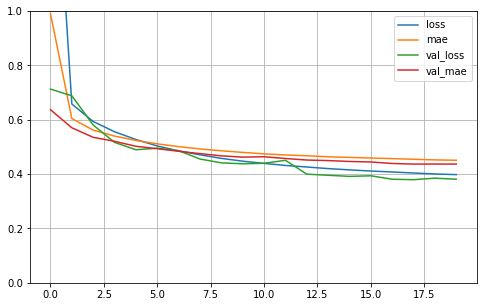

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(b=True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
X_new = X_test[:3]

In [17]:
# Command predict for do the regression
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5328768]
 [1.8915398]
 [3.404087 ]]
[0.477   0.458   5.00001]
